In [1]:
import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df=pd.read_csv('/content/moviedata.csv')



In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
print(df.isna().sum())

review       0
sentiment    0
dtype: int64


In [7]:
print(df.isna().sum())

review       0
sentiment    0
dtype: int64


In [8]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [9]:
# Convert the labels to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [10]:
# Clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove punctuation
    text = re.sub('[^\w\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    text = ' '.join(filtered_tokens)
    return text
    df['review'] = df['review'].apply(clean_text)
    

In [11]:
# Group the dataset by a specific column and analyze the results
grouped_df = df.groupby('review').mean()
print(grouped_df)

                                                    sentiment
review                                                       
A Turkish Bath sequence in a film noir loca...        1.0
!!! Spoiler alert!!!<br /><br />The point is, t...        0.0
!!!! MILD SPOILERS !!!!<br /><br />The premise ...        0.0
!!!! MILD SPOILERS !!!!<br /><br />With the exc...        0.0
!!!! POSSIBLE MILD SPOILER !!!!!<br /><br />As ...        0.0
...                                                       ...
{Possible spoilers coming up... you've been for...        1.0
{rant start} I didn't want to believe them at f...        0.0
~~I was able to see this movie yesterday mornin...        1.0
    Film auteur Stephan Woloszczuk explores the...        1.0
ý thýnk uzak ýs the one of the best films of al...        1.0

[49582 rows x 1 columns]


In [12]:
df['review'][:5]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [13]:
import re
filterdata=[]
for i in df['review']:
    i=i.lower()
    i=i.replace('[','')
    i=i.replace(']','')
    i=i.replace('(','')
    i=i.replace(')','')
    i=i.replace('{','')
    i=i.replace('}','')
    i=i.replace('[','')
    i=i.replace("%d+",'')
    i=i.replace('[--]+','')
    i=re.sub('[^A-za-z ]',"",i)
    filterdata.append(i)
filterdata[:5]

['one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [14]:
newtext=[]
stop=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',' br', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now',]
for i in filterdata:
    text = i.split()
    ntext=''
    for word in text:
        if word in stop:
            pass
        else:
            ntext+=" "+word
    newtext.append(ntext)
df['cleaned_text']=newtext
ps=PorterStemmer()
cleaned_data=[ps.stem(word) for word in df['cleaned_text']]
print(cleaned_data[:5])

[' one reviewers mentioned watching oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [15]:
x=cleaned_data
y=df['sentiment']

In [16]:
x[:5]

[' one reviewers mentioned watching oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [17]:
y[:5]

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=48)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [20]:
ob1=TfidfVectorizer()
ob2=LogisticRegression()

In [21]:
model=Pipeline([('vectorizer',ob1),('classifier',ob2)])
model.fit(xtrain,ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [22]:
ypred=model.predict(xtest)


In [23]:
ypred[:5]

array([1, 0, 0, 1, 1])

In [24]:
ytest[:5]

30644    1
49743    0
34124    0
26177    1
1429     1
Name: sentiment, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ypred,ytest))

0.8922


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ypred,ytest)

array([[2190,  237],
       [ 302, 2271]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
acc = accuracy_score(ytest, ypred)
prec = precision_score(ytest, ypred, pos_label=1)
rec = recall_score(ytest, ypred, pos_label=1)
f1 = f1_score(ytest, ypred, pos_label=1)

In [29]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.89
Precision: 0.88
Recall: 0.91
F1-score: 0.89


In [30]:
##EDA


<Axes: xlabel='sentiment'>

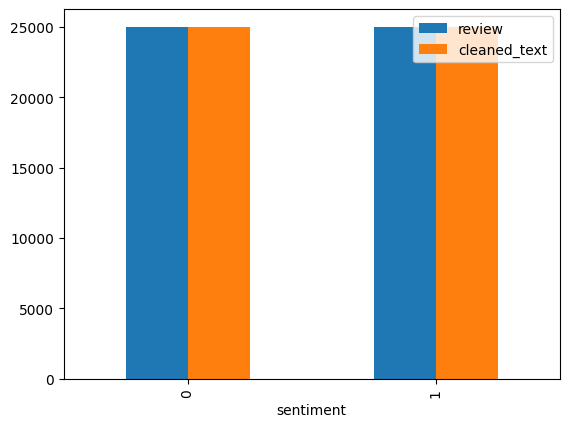

In [31]:
df.groupby('sentiment').count().plot(kind='bar')


<Axes: >

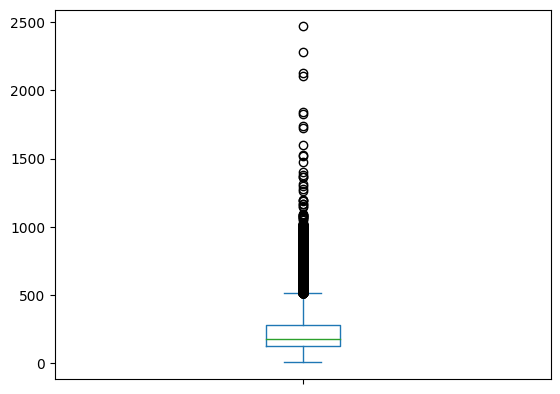

In [32]:
# Calculate review lengths
review_len = pd.Series([len(review.split()) for review in df['review']])

# The distribution of review text lengths
review_len.plot(kind='box')

<Axes: ylabel='Count'>

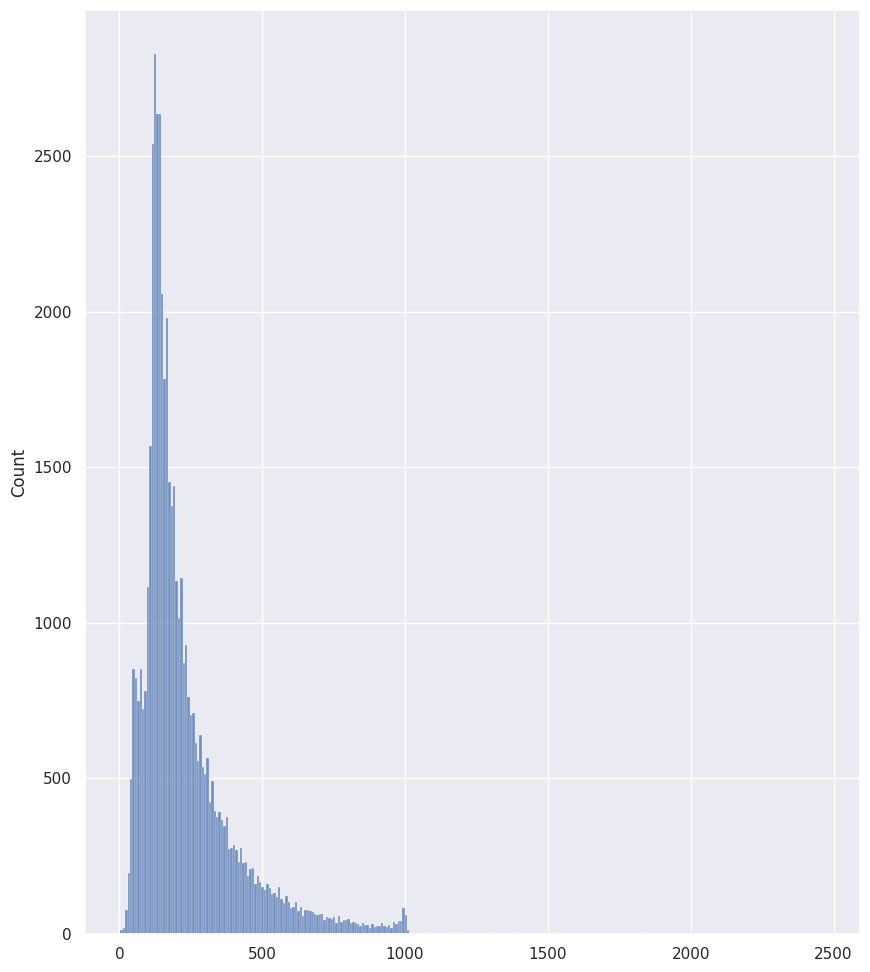

In [33]:
import seaborn as sns
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

plt.figure(figsize = (10,12))
sns.histplot(review_len)


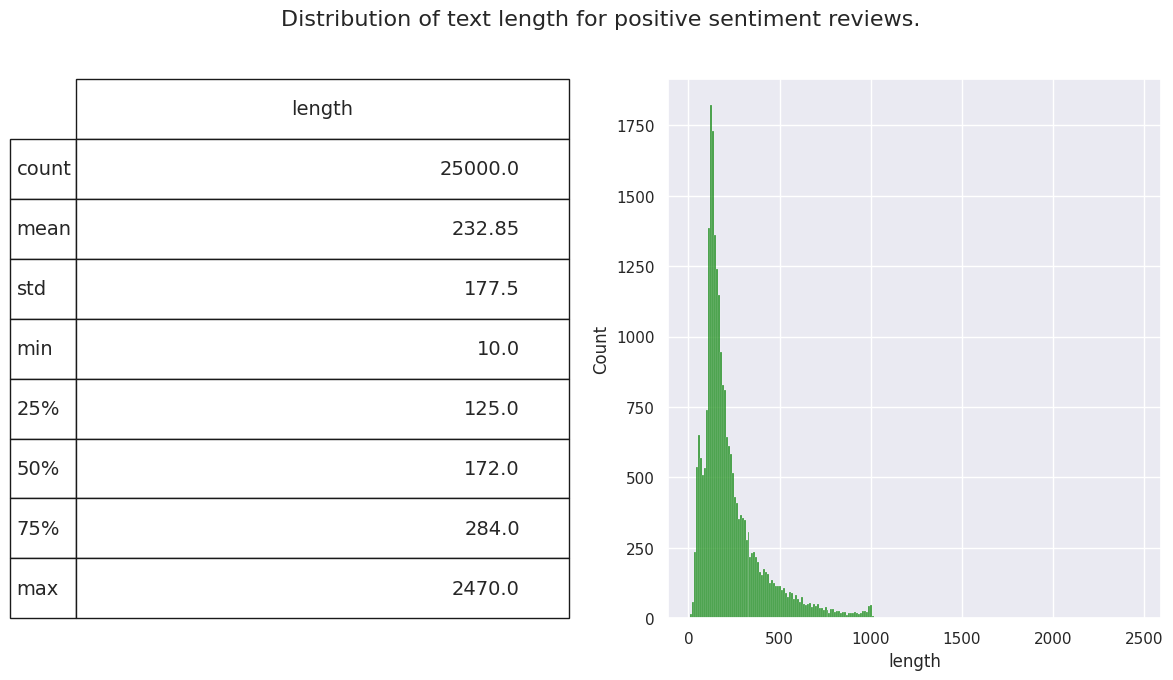

In [34]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']==1]['length'], ax=ax1,color='green')
describe = df.length[df.sentiment==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment reviews.', fontsize=16)

plt.show()

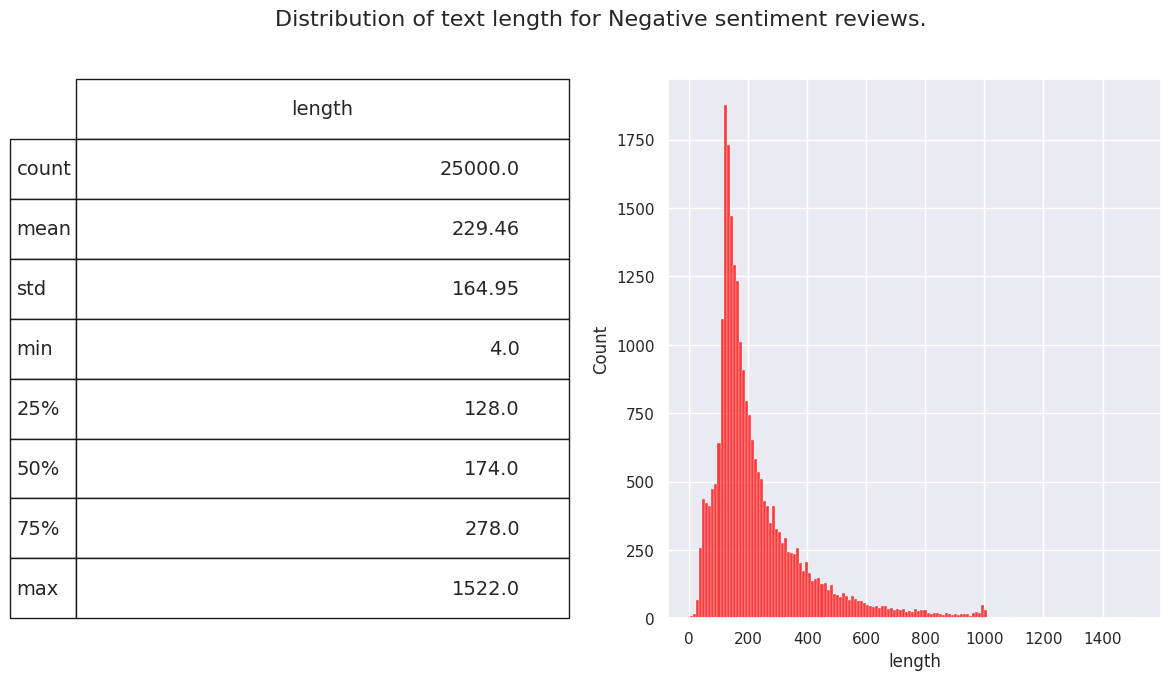

In [35]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']==0]['length'], ax=ax1,color='red')
describe = df.length[df.sentiment==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment reviews.', fontsize=16)

plt.show()

In [36]:
#BERT

In [37]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [38]:
!pip install -q tf-models-official

In [39]:
!pip data.shapeinstall -q tensorflow-text

ERROR: unknown command "data.shapeinstall"


In [55]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
from keras.optimizers import Adam
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')



In [47]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [48]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [49]:
classifier_model = build_classifier_model()

In [65]:
import tensorflow as tf
from official.nlp import optimization  # to create AdamW optimizer

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

epochs = 5
steps_per_epoch = 625 
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

classifier_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [66]:
X = df['review']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.review,df.sentiment,random_state = 0 , stratify = df.sentiment)

valid_size=5000
X_valid, y_valid = X_train[-valid_size:], y_train[-valid_size:]
X_test, y_test = X_train[:-valid_size], y_train[:-valid_size]
X_train, X_test, y_train, y_test = train_test_split(df.review,df.sentiment, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.16, random_state=1) # 0.25 x 0.8 = 0.2
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_valid.shape, y_valid.shape)
print('Test Set ->', X_test.shape, y_test.shape)

print('Number of reviews in the total set : {}'.format(len(X)))
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the validation set : {}'.format(len(X_valid)))
print('Number of reviews in the testing set : {}'.format(len(X_test)))

Train Set -> (33600,) (33600,)
Validation Set -> (5000,) (5000,)
Test Set -> (10000,) (10000,)
Number of reviews in the total set : 50000
Number of reviews in the training set : 33600
Number of reviews in the validation set : 5000
Number of reviews in the testing set : 10000


In [67]:

print(f'Training model with {tfhub_handle_encoder}')
history1 = classifier_model.fit(X_train, y_train,
                               validation_data=(X_valid, y_valid),
                               epochs=epochs,
                               batch_size = 100)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(100, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


KeyboardInterrupt: ignored

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

In [25]:
history_dict = history1.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')